In [1]:
!pip install opencv-python

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

(np.float64(-0.5), np.float64(5247.5), np.float64(3047.5), np.float64(-0.5))

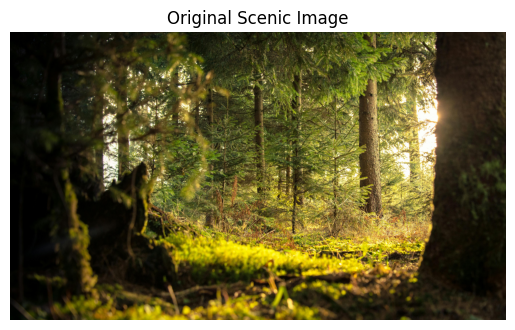

In [3]:
img = cv2.imread("scenic.jpg")

plt.imshow(img[:,:,::-1])
plt.title("Original Scenic Image")
plt.axis("off")

In [4]:
img[100:105, 100:105]

array([[[0, 1, 1],
        [0, 1, 1],
        [0, 1, 1],
        [0, 1, 1],
        [0, 1, 1]],

       [[0, 1, 1],
        [0, 1, 1],
        [0, 1, 1],
        [0, 1, 1],
        [0, 1, 1]],

       [[0, 1, 1],
        [0, 1, 1],
        [0, 1, 1],
        [0, 1, 1],
        [0, 1, 1]],

       [[0, 1, 1],
        [0, 1, 1],
        [0, 1, 1],
        [0, 1, 1],
        [0, 1, 1]],

       [[0, 1, 1],
        [0, 1, 1],
        [0, 1, 1],
        [0, 1, 1],
        [0, 1, 1]]], dtype=uint8)

Image is a 3D numeric array.
Each pixel has B, G, R values.
Similar numbers means smooth shading.
Computers must work at pixel level.

An image loaded into the computer is represented as a three-dimensional numerical array, where each pixel is defined by three intensity values corresponding to the Blue, Green, and Red color channels. These values typically range from 0 to 255. By printing a small 5×5 pixel region, it becomes clear that neighboring pixels often have very similar numerical values. This gradual variation in pixel values results in smooth shading and natural-looking transitions in the image. Computers must operate at this numerical level because all image processing and vision algorithms rely on mathematical operations performed directly on pixel values rather than on semantic concepts such as objects or scenes.

More to think – Answer:  
Even if two images share similar numeric ranges, they look different because the spatial arrangement and distribution of pixel values differ. Image appearance depends on how values are positioned relative to one another, not just on the range of intensities.

(np.float64(-0.5), np.float64(5247.5), np.float64(3047.5), np.float64(-0.5))

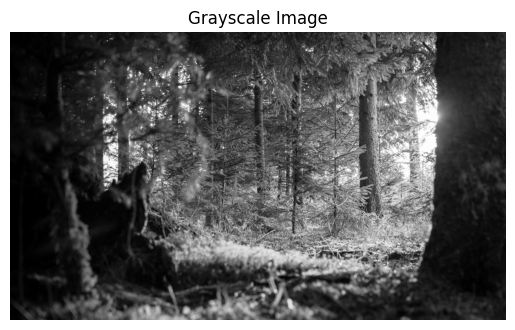

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

In [6]:
gray[100:105, 100:105]

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

Color info removed,structure preserved and has a faster computation.

When the image is converted to grayscale, color information is removed and each pixel is represented by a single intensity value. While color cues are lost, important structural information such as edges, shapes, and brightness variations are preserved. This shows that much of the image’s geometric structure does not depend on color. Grayscale images are widely used in early stages of image processing because they reduce computational complexity while retaining the most essential visual information needed for tasks such as edge detection and segmentation.

More to think – Answer:   
Although grayscale simplifies computation, modern vision systems often use color because color information can improve recognition accuracy, especially for tasks involving object classification and scene understanding.

(np.float64(-0.5), np.float64(499.5), np.float64(499.5), np.float64(-0.5))

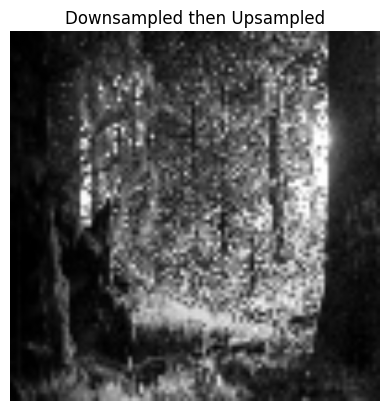

In [31]:
small = cv2.resize(gray, (100,100))
big = cv2.resize(small, (500,500))

plt.imshow(big, cmap='gray')
plt.title("Downsampled then Upsampled")
plt.axis("off")

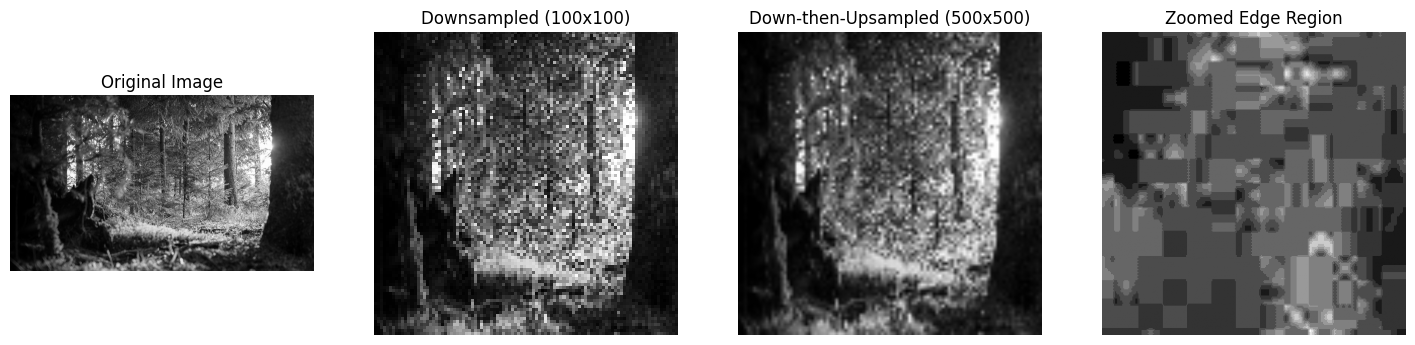

In [32]:
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv2.imread("scenic.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
h, w = gray.shape

# Step 1: Downsample to smaller resolution
small = cv2.resize(gray, (100,100))

# Step 2: Upsample back to larger size
big = cv2.resize(small, (500,500))

# Step 3: Zoom into a detailed edge region (e.g., mountain boundary)
# Adjust coordinates as needed: y1:y2, x1:x2
edge_region = gray[150:250, 300:400]  # example crop
zoom_edge = cv2.resize(edge_region, (300,300))

# Display all images in one figure
plt.figure(figsize=(18,6))

plt.subplot(1,4,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(small, cmap='gray')
plt.title("Downsampled (100x100)")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(big, cmap='gray')
plt.title("Down-then-Upsampled (500x500)")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(zoom_edge, cmap='gray')
plt.title("Zoomed Edge Region")
plt.axis("off")

plt.show()

Loss of detail. Blur / pixelation and noise reduction possibility.

Reducing the resolution of the image removes fine details and smooths out small features. When the reduced image is enlarged again, the lost information cannot be recovered, resulting in visible blur and pixelation. This demonstrates that resolution plays a critical role in preserving visual detail. Lower resolution images may negatively affect tasks that depend on fine features, such as texture analysis, but can sometimes help by reducing noise and emphasizing larger structural patterns.

More to think – Answer:  
Reducing resolution can help image processing tasks by suppressing noise and irrelevant details, allowing algorithms to focus on dominant structures rather than small variations.

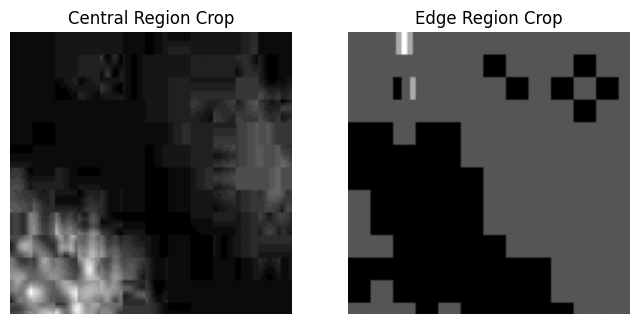

In [11]:
center_crop = gray[120:220, 120:220]
edge_crop = gray[0:100, 0:100]

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(center_crop, cmap='gray')
plt.title("Central Region Crop")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(edge_crop, cmap='gray')
plt.title("Edge Region Crop")
plt.axis("off")

plt.show()

ROI isolation.
Context importance

Cropping an image allows specific regions of interest to be isolated while removing unnecessary background information. A central crop may contain important structural content, while an edge crop may include less relevant details. This highlights how focusing on meaningful regions can simplify processing and improve recognition performance. However, excessive cropping may remove valuable contextual information, which is sometimes necessary for correct interpretation, such as understanding the surroundings of an object in a scene.


More to think – Answer:     
Cropping does not always help recognition because removing context can eliminate cues that are essential for understanding the image as a whole.

(np.float64(-0.5), np.float64(5247.5), np.float64(3047.5), np.float64(-0.5))

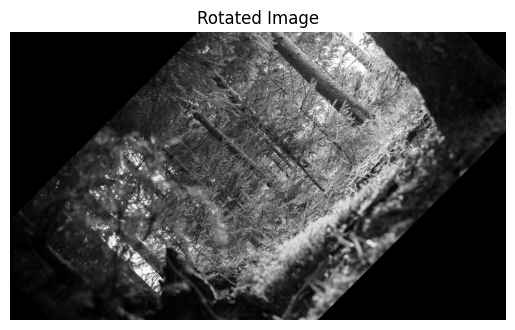

In [9]:
flip_h = cv2.flip(gray, 1)

h, w = gray.shape
M = cv2.getRotationMatrix2D((w//2, h//2), 45, 1)
rot = cv2.warpAffine(gray, M, (w, h))

plt.imshow(rot, cmap='gray')
plt.title("Rotated Image")
plt.axis("off")

Flip preserves meaning.
Rotation changes viewpoint.

Flipping and rotating an image introduce viewpoint variations that simulate changes in camera orientation. Horizontal flipping often preserves the identity of objects, while rotations can significantly alter their appearance. These transformations demonstrate how visual interpretation can remain consistent or change depending on viewpoint. Such operations are commonly used in data augmentation to improve the robustness of recognition models against variations in orientation and perspective.

More to think – Answer:     
A recognition model may treat flipped objects as the same or different depending on the task. For some objects, flipping does not change identity, while for others, orientation carries important semantic meaning.

(np.float64(-0.5), np.float64(5247.5), np.float64(3047.5), np.float64(-0.5))

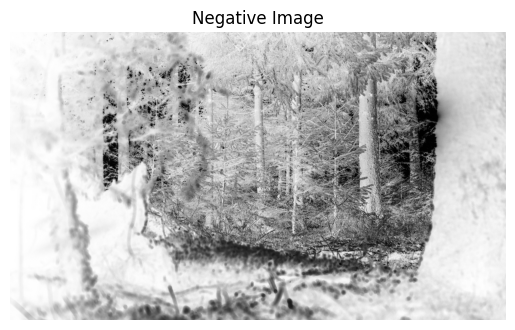

In [10]:
inv = cv2.bitwise_not(gray)

plt.imshow(inv, cmap='gray')
plt.title("Negative Image")
plt.axis("off")

Inverting pixel intensities transforms bright regions into dark regions and vice versa, producing a negative image. This transformation disrupts natural visual interpretation because human perception is adapted to typical lighting conditions. However, inversion can be useful in certain applications such as medical imaging or forensic analysis, where reversing contrast can help highlight hidden structures or subtle details that are not easily visible in the original image.

More to think – Answer:       
Image inversion can sometimes reveal patterns that are difficult to detect in normal lighting conditions, especially when contrast between regions is enhanced.

CSV loaded. Shape: (19, 784)


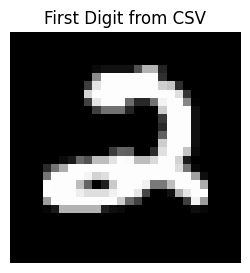

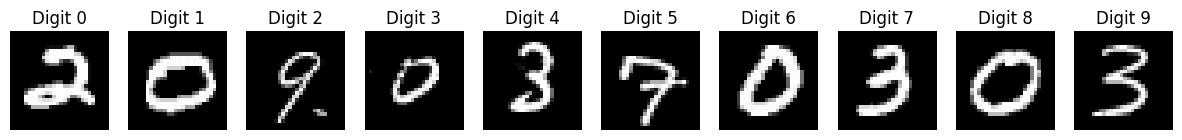

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load CSV as NumPy array
data = pd.read_csv("Digits_Lab_01.csv").to_numpy()
print("CSV loaded. Shape:", data.shape)  # e.g., (N, 784)

# Step 2: Display the first digit
digit = data[0].reshape(28,28)
plt.figure(figsize=(3,3))
plt.imshow(digit, cmap='gray')
plt.title("First Digit from CSV")
plt.axis("off")
plt.show()

# Step 3: Display multiple sample digits (first 10)
plt.figure(figsize=(15,3))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(data[i].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title(f"Digit {i}")
plt.show()

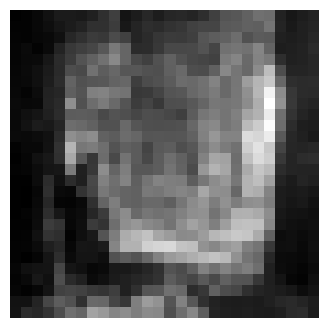

In [27]:
#Display Multiple Samples - looping over several rows to show multiple digits

plt.figure(figsize=(10,4))
# Iterate up to the number of available rows in the data array to prevent IndexError
for i in range(data.shape[0]):  # show all available digits
    plt.subplot(1, data.shape[0], i+1)
    plt.imshow(data[i].reshape(28,28), cmap='gray')
    plt.axis('off')
plt.show()

Numeric table - meaningful shape:

Each row of 784 numbers represents pixel intensities.
Reshaping into 28×28 restores the 2D spatial structure of the digit.
Without reshaping, it’s just a long line of numbers where no image is visible.

Importance for machine learning:
ML models rely on spatial relationships (pixels near each other).
Correct reshaping ensures the model “sees” the correct patterns of a digit.

Spatial encoding question:
If shuffled row order still shows recognizable digits after reshaping, it implies:
Each row independently encodes one digit.
The order of rows doesn’t matter for visualization, only for tasks like labels matching.

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv2.imread("scenic.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
h, w = gray.shape

In [29]:
#Define Affine Transform - Affine transforms include shear, shift, rotation, or scaling.

# Original points in the source image
pts1 = np.float32([[0,0], [100,0], [0,100]])
# Corresponding points in the transformed image
pts2 = np.float32([[0,0], [80,20], [20,100]])

# Compute the affine transformation matrix
M = cv2.getAffineTransform(pts1, pts2)

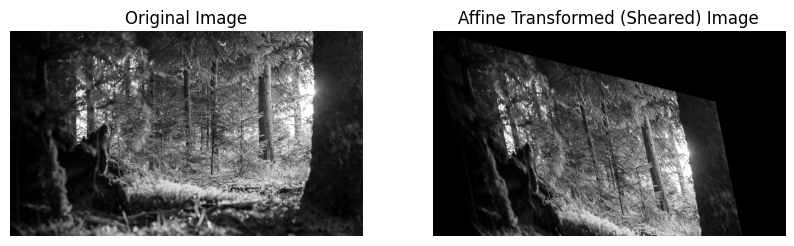

In [30]:
#Apply the Transform

aff = cv2.warpAffine(gray, M, (w, h))

# Display the result
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(aff, cmap='gray')
plt.title("Affine Transformed (Sheared) Image")
plt.axis("off")
plt.show()

Effect on object shapes:             
-Shear or shift distorts the relative angles or positions of objects.   
-Straight lines may appear slanted; rectangles may become parallelograms.
-These distortions mimic changes in camera perspective, e.g., tilting or moving the camera.

Impact on classifiers:       
-A classifier trained only on undistorted images may fail to recognize sheared versions.   
-Data augmentation (adding sheared images) helps make ML models more robust to perspective changes.

**Final Reflection:**

Viewing images as numeric matrices shifts my perception from pictures to arrays of pixel values, where each number represents intensity and their arrangement forms shapes. Operations like reshaping digits or applying affine transforms show that computers interpret structure and spatial relationships, not semantic meaning. The affine shear and shift were especially insightful, revealing how slight changes in pixel positions distort shapes, emphasizing that machines process images as data patterns rather than visual concepts.